In [23]:
#!python src/test/test_vimeo_cannyseg.py

In [24]:
from src.train.util import read_anno, keep_and_drop

file_ids, annos = read_anno('/data/datasets/vimeo/annotations.txt')

In [25]:
def get_annotation(file_id, file_ids, annos):
    if file_id in file_ids:
        index = file_ids.index(file_id)
        return annos[index]
    else:
        return "File ID not found."

In [26]:
get_annotation('00002_0062_im2', file_ids, annos)

'The image depicts a classroom setting with a group of children sitting at desks. There are at least 12 children in the room, engaged in various activities. Some of the children are wearing ties, indicating a formal or semi-formal setting. The classroom is well-equipped with multiple chairs, some of which are placed near the desks. There are also several bottles scattered around the room, possibly containing drinks for the children. A handbag can be seen placed on one of the desks, and a book is located near the center of the room. The children appear to be focused on their tasks, and the overall atmosphere of the classroom is one of learning and collaboration.\n'

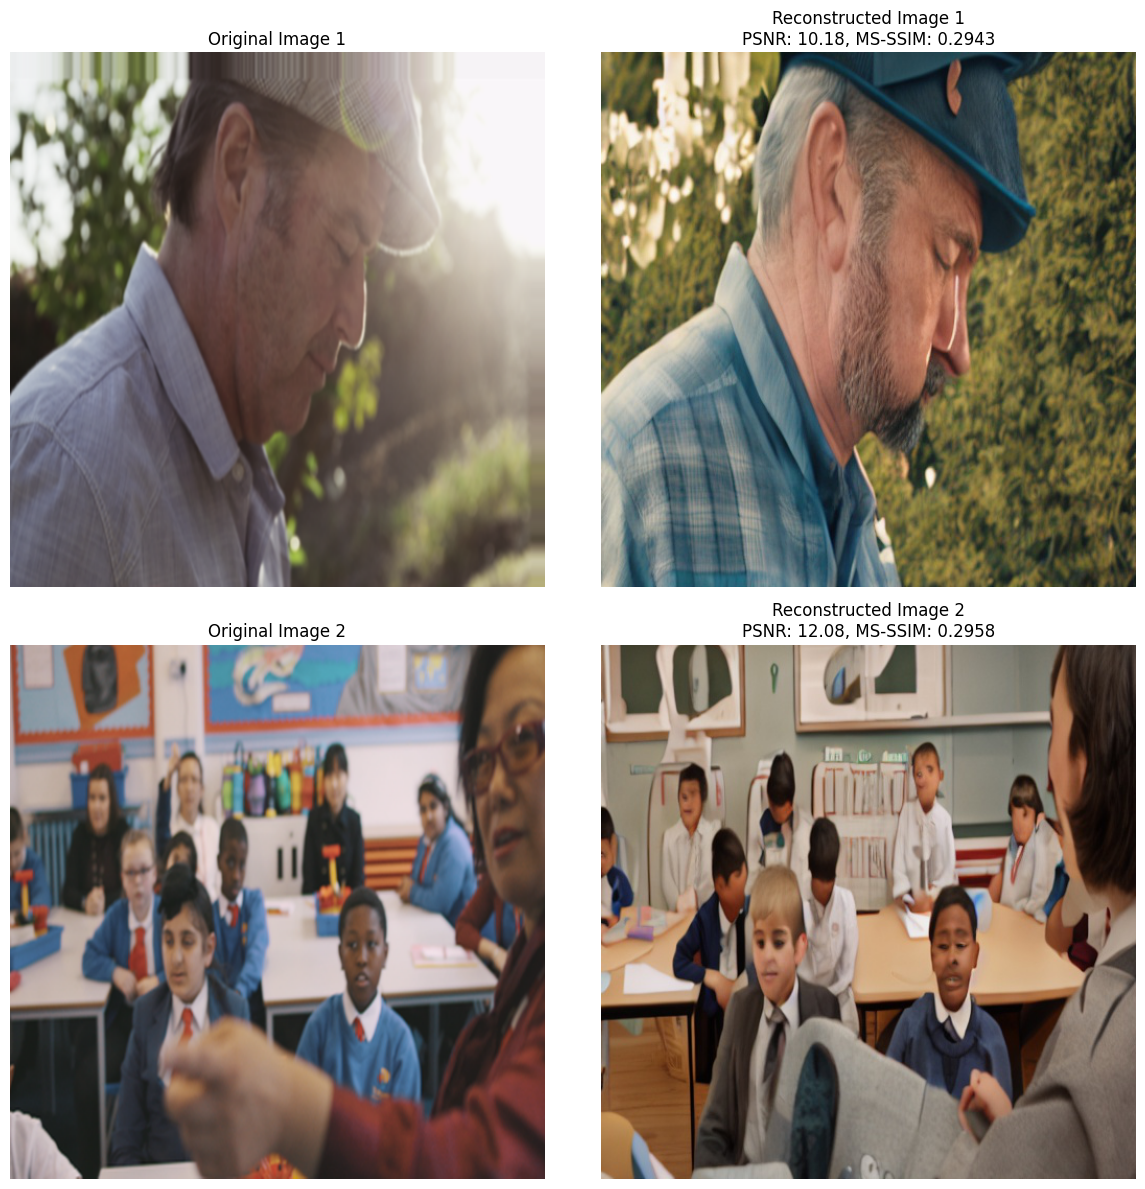

In [27]:
import math
from pytorch_msssim import ms_ssim
from torchvision import transforms
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from test_utils import calculate_metrics,resize_image

# Paths to the original and reconstructed images
original_paths = ['data/00001_0008_im2.png', 'data/00002_0062_im2.png']
recons_paths = ['data/result_csc.jpg', 'data/result_csc_62.jpg']

# Open the images
original_images = [resize_image(Image.open(image_path)) for image_path in original_paths]

# Load reconstructed images and resize
recon_images = [resize_image(Image.open(image_path)) for image_path in recons_paths]

orig1 = original_images[0]
recon1 = recon_images[0]
orig2 = original_images[1]
recon2 = recon_images[1]

# Calculate metrics
psnr1, mssim1 = calculate_metrics(orig1, [recon1])
psnr2, mssim2 = calculate_metrics(orig2, [recon2])

# Create a 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot the first original image
axs[0, 0].imshow(orig1)
axs[0, 0].set_title('Original Image 1')
axs[0, 0].axis('off')

# Plot the first reconstructed image with metrics
axs[0, 1].imshow(recon1)
axs[0, 1].set_title(f'Reconstructed Image 1\nPSNR: {psnr1[0]:.2f}, MS-SSIM: {mssim1[0]:.4f}')
axs[0, 1].axis('off')

# Plot the second original image
axs[1, 0].imshow(orig2)
axs[1, 0].set_title('Original Image 2')
axs[1, 0].axis('off')

# Plot the second reconstructed image with metrics
axs[1, 1].imshow(recon2)
axs[1, 1].set_title(f'Reconstructed Image 2\nPSNR: {psnr2[0]:.2f}, MS-SSIM: {mssim2[0]:.4f}')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
